<a href="https://colab.research.google.com/github/rjfeuser/rna-transfer-learning/blob/main/notebooks/BinarizacaoImagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Instalar bibliotecas necessárias (se ainda não estiverem instaladas)
!pip install opencv-python scikit-learn

# 2. Importar as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# 3. Carregar e exibir a imagem original
# O Colab precisa de um método para carregar arquivos.
# Você pode fazer upload de uma imagem ou usar uma URL.
# Neste exemplo, vamos usar uma URL de uma imagem de teste.
#!wget "https://upload.wikimedia.org/wikipedia/commons/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg" -O "monalisa.jpg"
!wget --no-check-certificate "https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_color.tiff" -O "lena.tiff"

#image_path = 'monalisa.jpg'
image_path = 'lena.tiff'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

--2025-08-08 20:33:20--  https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_color.tiff
Resolving eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)... 128.238.64.104
Connecting to eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)|128.238.64.104|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 786572 (768K) [image/tiff]
Saving to: ‘lena.tiff’

lena.tiff           100%[===================>] 768.14K  --.-KB/s    in 0.04s   

2025-08-08 20:33:20 (17.1 MB/s) - ‘lena.tiff’ saved [786572/786572]



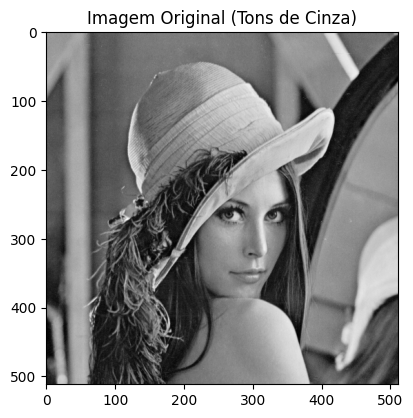

In [ ]:
# Verifique se a imagem foi carregada corretamente
if image is None:
    print("Erro: Não foi possível carregar a imagem. Verifique o caminho do arquivo.")
else:
    # Exibir a imagem original
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagem Original (Tons de Cinza)")
    plt.imshow(image, cmap='gray')


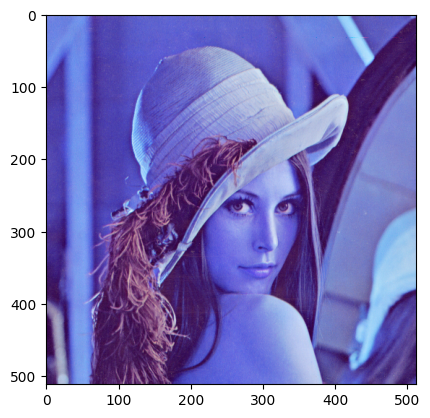

In [ ]:
img = cv2.imread(image_path)
plt.imshow(img)

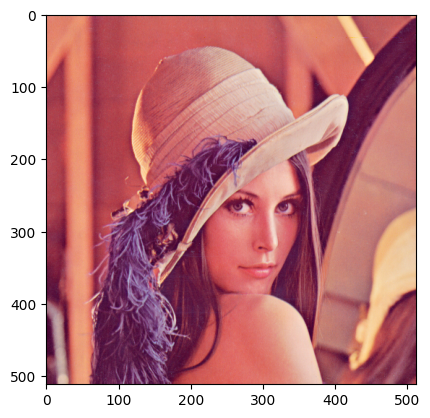

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

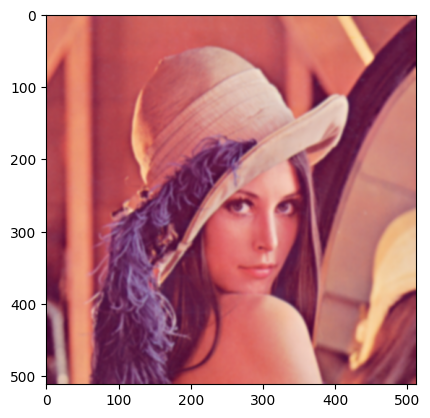

In [ ]:
suave = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(suave)

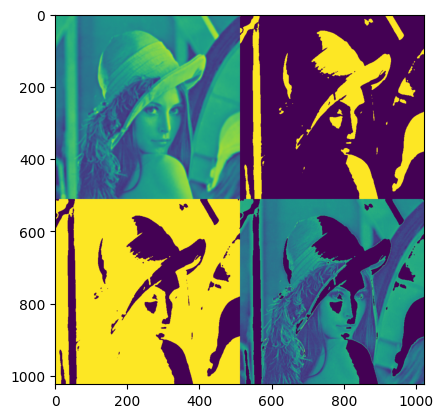

In [ ]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suave = cv2.GaussianBlur(img, (7, 7), 0)

(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY_INV)
resultado = np.vstack([
    np.hstack([suave, bin]),
    np.hstack([binI, cv2.bitwise_and(img, img, mask = binI)])
])

plt.imshow(resultado)


In [15]:
# 4. Pré-processamento e criação de dados de treinamento
# Para treinar o modelo, precisamos de dados de entrada (features) e dados de saída (labels).
# As features serão os valores de pixel.
# As labels serão os valores binários (0 ou 1) que queremos que o modelo aprenda.
# Vamos usar um limiar simples para gerar as labels de treino.

# Limiar simples (threshold) para gerar os dados de treino
limiar = 127
binary_image_ground_truth = (image > limiar).astype(np.uint8) * 255

# Preparar os dados para o modelo
X = image.flatten().reshape(-1, 1)  # Features: valores de pixel
y = (binary_image_ground_truth / 255).flatten()  # Labels: 0 ou 1

In [16]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Treinar o modelo de Machine Learning (k-NN)
# k-NN (k-Nearest Neighbors) é um classificador simples e eficaz.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# 6. Avaliar o modelo
y_pred = knn.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo k-NN: {acuracia:.4f}")


Acurácia do modelo k-NN: 1.0000


In [18]:
# 7. Realizar a binarização na imagem completa usando o modelo treinado
X_full = image.flatten().reshape(-1, 1)
y_full_pred = knn.predict(X_full)

# Remodelar a saída para o formato da image
binary_image_ml = y_full_pred.reshape(image.shape) * 255

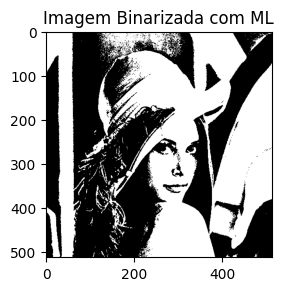

In [19]:
# 8. Exibir a imagem binarizada
plt.subplot(1, 2, 2)
plt.title("Imagem Binarizada com ML")
plt.imshow(binary_image_ml, cmap='gray')
plt.show()